# Lab 3- Linear Regression and Linear Discriminant Analysis from scratch
This notebook looks at implementing linear regression and LDA from scratch. Please use it to augment your understanding of the notes.

Text(0.5, 0, 'x')

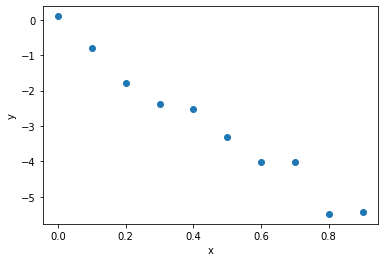

In [31]:
import numpy as np
import matplotlib.pyplot as plt

y = np.load('y_values.npy')
x = np.load('x_values.npy')

import matplotlib.pyplot as plt


plt.scatter(x, y)
plt.ylabel('y')
plt.xlabel('x')



[[-3.14442237]]


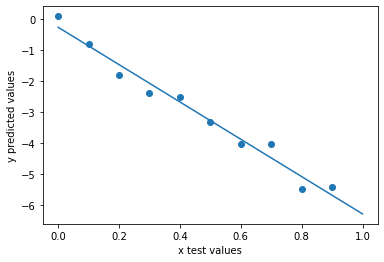

In [33]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
linearObject = linear_model.LinearRegression()
linearObject.fit(x, y)

xTestValues = np.load('test_x_values.npy')

yPredict = linearObject.predict(xTestValues)


plt.scatter(x, y)
plt.plot(xTestValues, yPredict)
plt.ylabel('y predicted values')
plt.xlabel('x test values')

predictedx = (linearObject.coef_*0.48) + linearObject.intercept_
print(predictedx)

Instructions said use a triangle marker

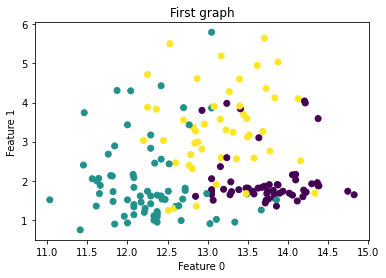

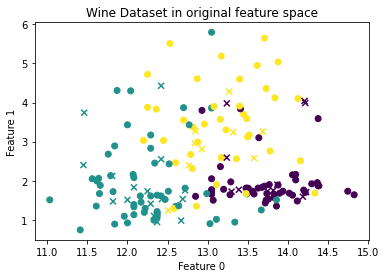

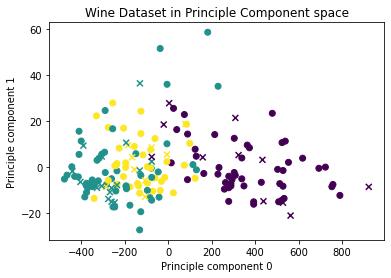

In [86]:
data = np.load('wineData.npy')
labels = np.load('wineLabels.npy')
plt.scatter(data[:, 0], data[:, 1], c= labels)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('First graph')
plt.show()

n = data.shape[0]
split_point = int(n * 0.8)

train_data = data[:split_point, :] 
train_labels = labels[:split_point] 
test_data = data[split_point:, :] 
test_labels = labels[split_point:] 

plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], marker= 'x', c=test_labels)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Wine Dataset in original feature space')
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_data = pca.fit_transform(train_data)
test_data = pca.transform(test_data)

plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], marker= 'x', c=test_labels)
plt.xlabel('Principle component 0')
plt.ylabel('Principle component 1')
plt.title('Wine Dataset in Principle Component space')
plt.show()

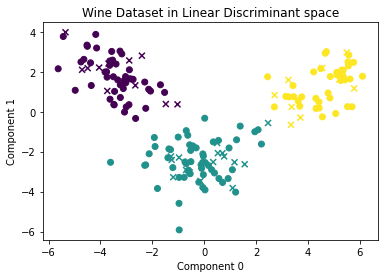

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

n = data.shape[0]
split_point = int(n * 0.8)

train_data = data[:split_point, :] 
train_labels = labels[:split_point] 
test_data = data[split_point:, :] 
test_labels = labels[split_point:] 

train_data = lda.fit_transform(train_data, train_labels)
test_data = lda.transform(test_data)

plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], marker= 'x', c=test_labels)
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title('Wine Dataset in Linear Discriminant space')
plt.show()

In [104]:
n = data.shape[0]
split_point = int(n * 0.8)

train_data = data[:split_point, :] 
train_labels = labels[:split_point] 
test_data = data[split_point:, :] 
test_labels = labels[split_point:] 

mean = train_data.mean()

meanCentred = train_data - mean
print(meanCentred)

np.linalg.svd(meanCentred)





[[-56.27510076 -64.94510076 -67.54510076 ... -68.98510076 -67.84510076
  480.10489924]
 [-58.07510076 -68.17510076 -68.01510076 ... -68.95510076 -67.45510076
  345.10489924]
 [-56.01510076 -64.85510076 -67.66510076 ... -69.31510076 -68.56510076
  345.10489924]
 ...
 [-56.81510076 -65.99510076 -67.53510076 ... -69.32510076 -68.56510076
  480.10489924]
 [-56.03510076 -68.38510076 -67.22510076 ... -68.53510076 -66.73510076
  340.10489924]
 [-55.87510076 -68.21510076 -67.68510076 ... -68.85510076 -66.30510076
  965.10489924]]


(array([[-0.05586873,  0.08291861, -0.02735865, ..., -0.05996389,
         -0.08604169, -0.07622057],
        [-0.04188373,  0.11740018, -0.05139908, ..., -0.03052205,
          0.08059531,  0.08423538],
        [-0.04182928,  0.11598078, -0.08901873, ..., -0.0239108 ,
         -0.04275791, -0.05665441],
        ...,
        [-0.0559264 ,  0.08344348,  0.10830911, ...,  0.91067369,
          0.02655998,  0.03590691],
        [-0.04127239,  0.11560518, -0.04815269, ...,  0.00340039,
          0.84468958, -0.00401267],
        [-0.10622673, -0.03603328, -0.05770487, ...,  0.03895764,
         -0.02243608,  0.94636661]]),
 array([9.30873823e+03, 1.04641356e+03, 1.55708045e+02, 3.52357130e+01,
        2.70602073e+01, 1.32902950e+01, 6.71907125e+00, 6.03449840e+00,
        4.61347489e+00, 3.99610881e+00, 3.01650263e+00, 2.04116430e+00,
        1.21890680e+00]),
 array([[ 6.68211221e-02,  7.98086861e-02,  7.96179266e-02,
          6.00914045e-02, -3.82118211e-02,  7.95667178e-02,
          7

//projection_matrix = vh[slice indices]
//projected_train_data = meanCentered @ np.transpose(projection_matrix)